In [31]:
import os
import numpy as np
import math
import time
import seaborn as sns
import matplotlib.pyplot as plt

from dataclasses import dataclass
from typing import Any, List, Tuple, Dict

from core.ga import read_problem ,GA2
from core.ga import GA
from core.pso import PSO

### Utilization function

In [32]:
ddir = './datasets'
path = [ os.path.join(ddir,p) for p in os.listdir(ddir) if not p.startswith('test')]
path

['./datasets\\a280-n1395.txt',
 './datasets\\a280-n279.txt',
 './datasets\\a280-n2790.txt',
 './datasets\\fnl4461-n22300.txt',
 './datasets\\fnl4461-n4460.txt',
 './datasets\\fnl4461-n44600.txt',
 './datasets\\pla33810-n169045.txt',
 './datasets\\pla33810-n33809.txt',
 './datasets\\pla33810-n338090.txt']

In [33]:
def is_dominated(chrom1, chrom2):
    """
    Check if chrom1 is dominated by chrom2.
    """
    return (chrom2.phenome.time <= chrom1.phenome.time and chrom2.phenome.profit >= chrom1.phenome.profit) and \
           (chrom2.phenome.time < chrom1.phenome.time or chrom2.phenome.profit > chrom1.phenome.profit)

def find_dominance_flags(population):
    """
    Assign a flag for each chromosome in the population.
    1 for non-dominated, 0 for dominated.
    """
    flags = [1] * len(population)  # Initialize all as non-dominated

    for i, chrom1 in enumerate(population):
        for chrom2 in population:
            if chrom1 != chrom2 and is_dominated(chrom1, chrom2):
                flags[i] = 0  # Mark as dominated
                break  # No need to check further if dominated

    return flags

In [34]:
def is_dominated2(chrom1, chrom2):
    """
    Check if chrom1 is dominated by chrom2.
    """
    return (chrom2.personal_best_score.time <= chrom1.personal_best_score.time and chrom2.personal_best_score.profit >= chrom1.personal_best_score.profit) and \
           (chrom2.personal_best_score.time < chrom1.personal_best_score.time or chrom2.personal_best_score.profit > chrom1.personal_best_score.profit)

def find_dominance_flags2(population):
    """
    Assign a flag for each chromosome in the population.
    1 for non-dominated, 0 for dominated.
    """
    flags = [1] * len(population)  # Initialize all as non-dominated

    for i, chrom1 in enumerate(population):
        for chrom2 in population:
            if chrom1 != chrom2 and is_dominated2(chrom1, chrom2):
                flags[i] = 0  # Mark as dominated
                break  # No need to check further if dominated

    return flags


In [35]:
def plot_experiment_results(data, ga, res):
    population = res[0]
    best_chromosome = res[1]
    ga_flag = find_dominance_flags(ga.population)

    print(f"======MetaData======")
    print(f"name : {data.Name}")
    print(f"num dimension : {data.Dimension}")
    print(f"num item : {data.ITEMS}")
    print(f"max weight : {data.CAPACITY}")
    print(f"speed range: [{data.MIN_SPEED},{data.MAX_SPEED}]")
    print(f"renting ratio : {data.RENTING_RATIO}")
    print('======Genetic parameters======')
    print(f'max iteration: {ga.iterations}')
    print(f'max population: {ga.population_size}')
    print(f'max toursize: {ga.tour_size}')
    print(f"======experiment result======")
    print(f"time executed: {ga.time_execute} seconds")
    print(f"best path : {best_chromosome.path} | best plan : {best_chromosome.plan}")
    print(f"time : {best_chromosome.phenome.time} | profit : {best_chromosome.phenome.profit}")
    print(f"Net profit : {best_chromosome.phenome.net_profit}")
    
    sns.scatterplot(y=[x.phenome.profit for x in population], x=[x.phenome.time for x in population], hue=ga_flag)
    plt.scatter(best_chromosome.phenome.time, best_chromosome.phenome.profit, color='red', label='best')
    plt.xlabel("time")
    plt.ylabel("profit")
    plt.title(f"Dataset: {data.Name}")
    plt.show()

In [36]:
def plot_experiment_results2(data, pso, res):
    best_path , best_plan, best_score = res
    population = pso.particles
    flag = find_dominance_flags2(population)

    print(f"======MetaData======")
    print(f"name : {data.Name}")
    print(f"num dimension : {data.Dimension}")
    print(f"num item : {data.ITEMS}")
    print(f"max weight : {data.CAPACITY}")
    print(f"speed range: [{data.MIN_SPEED},{data.MAX_SPEED}]")
    print(f"renting ratio : {data.RENTING_RATIO}")
    print('======Genetic parameters======')
    print(f'max iteration: {pso.iterations}')
    print(f'max population: {pso.num_particles}')
    print(f"======experiment result======")
    # print(f"time executed: {ga.time_execute} seconds")
    print(f"best path : {best_path} | best plan : {best_plan}")
    print(f"time : {best_score.time} | profit : {best_score.profit}")
    print(f"Net profit : {best_score.net_profit}")
    
    sns.scatterplot(y=[x.personal_best_score.profit for x in population], x=[x.personal_best_score.time for x in population], hue=flag)
    plt.scatter(best_score.time, best_score.profit, color='red', label='best')
    plt.xlabel("time")
    plt.ylabel("profit")
    plt.title(f"Dataset: {data.Name}")
    plt.show()

## Genetic Algorithm

## Experiment

In [37]:
pop_size = 10
tour_size = 7
max_generation = 100
mut_prob = 0.45
cross_prob = 0.90

In [38]:
data = read_problem('./datasets/test-example-n4.txt')
data

TTP(Name='Test', DTYPE='unknown', Dimension=4, ITEMS=3, CAPACITY=80, MIN_SPEED=0.1, MAX_SPEED=1.0, RENTING_RATIO=1.516, EDGE_W='CEIL_2D', NODE=[City(index=1, X=0.0, Y=0.0), City(index=2, X=4.0, Y=0.0), City(index=3, X=8.0, Y=3.0), City(index=4, X=0.0, Y=3.0)], ITEM=[Item(index=2, Profit=34, Weight=30, Node=2), Item(index=3, Profit=40, Weight=40, Node=3), Item(index=4, Profit=25, Weight=21, Node=4)])

In [39]:
ga = GA(
    data,
    pop_size,
    max_generation,
    tour_size,
    mut_prob,
    cross_prob
)
res = ga.run() # return final population , best chromosome

======MetaData======
name : Test
num dimension : 4
num item : 3
max weight : 80
speed range: [0.1,1.0]
renting ratio : 1.516
======Genetic parameters======
max iteration: 100
max population: 10
max toursize: 7
======experiment result======
time executed: 0.03999590873718262 seconds
best path : [1, 2, 3, 4] | best plan : [0, 1, 1]
time : 33.107207533502354 | profit : 65
Net profit : 14.80947337921043


c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

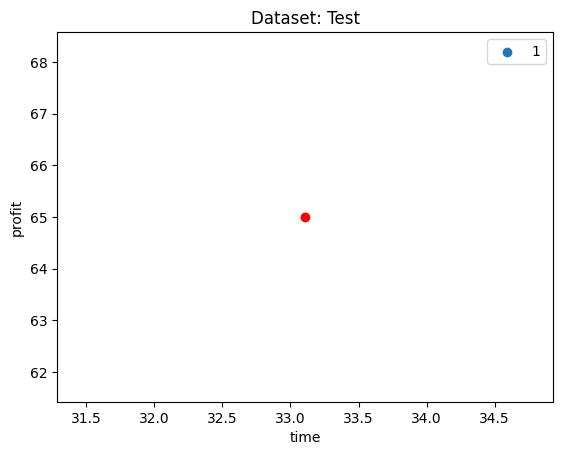

In [40]:
population = res[0]
best_chromosome = res[1]
ga_flag = find_dominance_flags(ga.population)

# print(f"dataset: {path2.split('/')[-1].split('.')[0]}")
print(f"======MetaData======")
print(f"name : {data.Name}")
print(f"num dimension : {data.Dimension}")
print(f"num item : {data.ITEMS}")
print(f"max weight : {data.CAPACITY}")
print(f"speed range: [{data.MIN_SPEED},{data.MAX_SPEED}]")
print(f"renting ratio : {data.RENTING_RATIO}")
print('======Genetic parameters======')
print(f'max iteration: {ga.iterations}')
print(f'max population: {ga.population_size}')
print(f'max toursize: {ga.tour_size}')
print(f"======experiment result======")
print(f"time executed: {ga.time_execute} seconds")
print(f"best path : {best_chromosome.path} | best plan : {best_chromosome.plan}")
print(f"time : {best_chromosome.phenome.time} | profit : {best_chromosome.phenome.profit}")
print(f"Net profit : {best_chromosome.phenome.net_profit}")
sns.scatterplot(y=[x.phenome.profit for x in population],x=[x.phenome.time for x in population],hue=ga_flag)
plt.scatter(best_chromosome.phenome.time, best_chromosome.phenome.profit, color='red',label='best')
plt.xlabel("time")
plt.ylabel("profit")
plt.title(f"Dataset: {data.Name}")
plt.show()

a280-n279

In [41]:
path[0]

'./datasets\\a280-n1395.txt'

In [42]:
data0 = read_problem(path[0])
ga0 = GA(
    data0,
    pop_size,
    max_generation,
    tour_size,
    mut_prob,
    cross_prob
)
res0 = ga0.run()


======MetaData======
name : a280-TTP
num dimension : 280
num item : 1395
max weight : 637010
speed range: [0.1,1.0]
renting ratio : 72.7
======Genetic parameters======
max iteration: 100
max population: 10
max toursize: 7
======experiment result======
time executed: 11.921002864837646 seconds
best path : [219, 127, 251, 56, 201, 280, 256, 142, 21, 174, 60, 22, 273, 82, 91, 130, 117, 254, 249, 196, 150, 24, 248, 207, 33, 113, 30, 226, 271, 134, 267, 186, 101, 160, 103, 123, 141, 255, 188, 266, 32, 246, 164, 79, 177, 50, 194, 65, 55, 223, 184, 235, 225, 131, 102, 227, 15, 199, 241, 218, 243, 197, 75, 44, 46, 14, 236, 70, 7, 156, 1, 35, 211, 87, 259, 124, 262, 220, 52, 83, 25, 26, 242, 19, 261, 125, 17, 139, 129, 172, 48, 68, 165, 9, 183, 23, 206, 105, 250, 5, 145, 88, 222, 215, 8, 237, 98, 132, 96, 151, 121, 80, 99, 228, 170, 179, 18, 40, 245, 92, 274, 279, 4, 195, 244, 112, 257, 229, 72, 232, 178, 63, 205, 202, 167, 258, 116, 16, 272, 193, 208, 20, 45, 157, 158, 180, 10, 182, 163, 185, 

c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

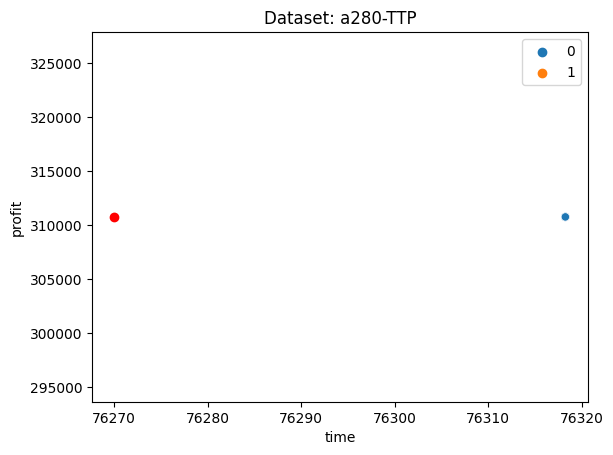

In [43]:
plot_experiment_results(data0,ga0,res0)

a280-n1395

In [44]:
data1 = read_problem(path[1])
ga1 = GA(
    data1,
    pop_size,
    max_generation,
    tour_size,
    mut_prob,
    cross_prob
)
res1 = ga1.run()

======MetaData======
name : a280-TTP
num dimension : 280
num item : 279
max weight : 25936
speed range: [0.1,1.0]
renting ratio : 5.61
======Genetic parameters======
max iteration: 100
max population: 10
max toursize: 7
======experiment result======
time executed: 2.5899975299835205 seconds
best path : [112, 5, 12, 141, 221, 165, 109, 31, 52, 125, 94, 217, 20, 151, 113, 274, 158, 223, 76, 261, 150, 173, 36, 162, 211, 138, 68, 155, 6, 136, 148, 166, 16, 236, 102, 183, 133, 90, 49, 27, 241, 209, 30, 108, 269, 189, 239, 143, 64, 198, 264, 70, 61, 275, 235, 50, 131, 92, 100, 212, 142, 39, 258, 140, 268, 97, 139, 4, 115, 219, 187, 62, 254, 255, 231, 174, 65, 21, 196, 53, 172, 259, 256, 205, 201, 56, 59, 124, 48, 273, 218, 262, 137, 75, 169, 164, 55, 45, 257, 80, 105, 224, 195, 272, 74, 280, 126, 42, 170, 23, 3, 29, 34, 206, 181, 144, 246, 277, 119, 168, 252, 149, 208, 123, 276, 17, 267, 153, 69, 22, 77, 263, 244, 152, 114, 226, 213, 44, 178, 225, 47, 179, 278, 129, 270, 98, 38, 134, 82, 202

c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

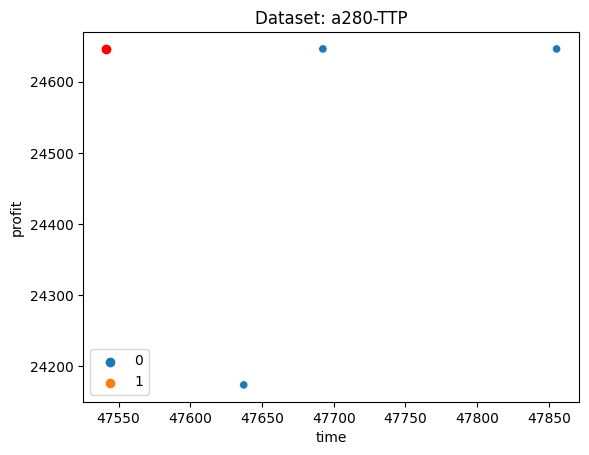

In [45]:
plot_experiment_results(data1,ga1,res1)

a280-n2790

In [46]:
data2 = read_problem(path[2])
ga2 = GA(
    data2,
    pop_size,
    max_generation,
    tour_size,
    mut_prob,
    cross_prob
)
res2 = ga2.run()

======MetaData======
name : a280-TTP
num dimension : 280
num item : 2790
max weight : 1262022
speed range: [0.1,1.0]
renting ratio : 208.53
======Genetic parameters======
max iteration: 100
max population: 10
max toursize: 7
======experiment result======
time executed: 21.653958797454834 seconds
best path : [211, 187, 245, 272, 140, 120, 3, 144, 252, 71, 156, 24, 102, 104, 91, 155, 193, 186, 151, 224, 65, 53, 84, 158, 243, 178, 46, 176, 278, 195, 217, 234, 33, 68, 208, 201, 254, 190, 210, 118, 98, 276, 50, 5, 14, 237, 90, 119, 188, 107, 269, 205, 60, 197, 143, 36, 265, 26, 32, 138, 101, 233, 200, 264, 130, 159, 133, 240, 257, 185, 222, 121, 246, 134, 184, 279, 230, 192, 61, 277, 258, 72, 70, 87, 111, 189, 229, 142, 146, 212, 235, 270, 241, 215, 167, 54, 59, 57, 242, 171, 62, 153, 162, 131, 198, 216, 88, 81, 103, 160, 93, 225, 163, 96, 18, 180, 58, 126, 236, 137, 196, 74, 34, 206, 83, 177, 139, 161, 97, 39, 135, 251, 219, 66, 170, 40, 41, 55, 261, 1, 223, 275, 165, 67, 220, 182, 116, 28

c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

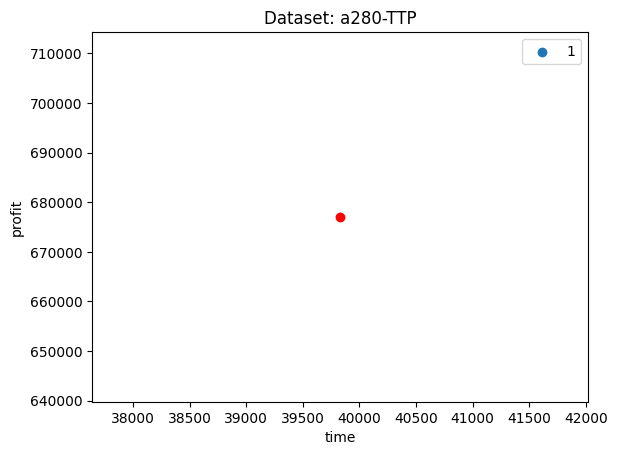

In [47]:
plot_experiment_results(data2,ga2,res2)

fnl4461-n4460

In [49]:
data3 = read_problem(path[3])
ga3 = GA(
    data3,
    pop_size,
    max_generation, 
    tour_size,
    mut_prob,
    cross_prob
)
res3 = ga3.run()

======MetaData======
name : fnl4461-TTP
num dimension : 4461
num item : 22300
max weight : 10182055
speed range: [0.1,1.0]
renting ratio : 17.26
======Genetic parameters======
max iteration: 100
max population: 10
max toursize: 7
======experiment result======
time executed: 3180.848218202591 seconds
best path : [883, 2050, 1938, 2955, 855, 3431, 4450, 3377, 459, 120, 1886, 3027, 95, 4009, 2456, 3124, 2626, 2429, 2403, 3624, 693, 3556, 3474, 959, 3930, 1641, 2404, 3465, 4265, 1698, 770, 1802, 3130, 1252, 3191, 848, 850, 2004, 2658, 2122, 3631, 1881, 946, 3098, 4151, 1658, 1185, 1114, 2746, 2527, 1864, 2024, 2986, 498, 2912, 1286, 4272, 4283, 4044, 435, 1951, 29, 687, 4020, 3593, 1631, 552, 3160, 2357, 1371, 1436, 2869, 2952, 3370, 2019, 3005, 2960, 3991, 2737, 747, 4398, 4193, 605, 2525, 4017, 1359, 866, 3576, 276, 1997, 880, 3404, 3702, 4346, 465, 284, 834, 1417, 2720, 2448, 1694, 4418, 458, 189, 2013, 2256, 470, 1160, 452, 934, 1917, 1850, 455, 1885, 3799, 2979, 2035, 4331, 291, 289, 

c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

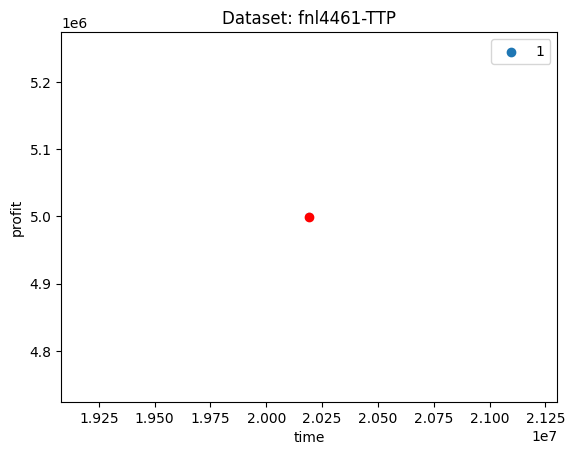

In [50]:
plot_experiment_results(data3,ga3,res3)

fnl4461-n22300

In [51]:
data4 = read_problem(path[4])
ga4 = GA(
    data4,
    pop_size,
    max_generation,
    tour_size,
    mut_prob,
    cross_prob
)
res4 = ga4.run()

======MetaData======
name : fnl4461-TTP
num dimension : 4461
num item : 4460
max weight : 387150
speed range: [0.1,1.0]
renting ratio : 1.4
======Genetic parameters======
max iteration: 100
max population: 10
max toursize: 7
======experiment result======
time executed: 463.7883937358856 seconds
best path : [4343, 3675, 1756, 2177, 3035, 3776, 3147, 259, 992, 3196, 291, 1227, 1552, 4406, 1761, 2012, 566, 899, 1324, 2970, 1084, 1982, 2684, 1023, 3285, 518, 1164, 1856, 2674, 4105, 201, 4217, 1657, 2768, 4434, 1851, 1984, 3571, 4159, 1498, 1949, 1067, 363, 1089, 4222, 2806, 686, 207, 3813, 113, 643, 229, 685, 1796, 762, 869, 3448, 2070, 3982, 3648, 4383, 3092, 394, 274, 3800, 1779, 4363, 3410, 3718, 1328, 1725, 3693, 39, 476, 3354, 3283, 3739, 1513, 4266, 923, 4023, 220, 2592, 396, 4437, 4091, 2629, 1734, 687, 2078, 1596, 540, 1744, 1130, 2103, 3210, 2581, 554, 3841, 2035, 3732, 2398, 4314, 1369, 3951, 519, 2872, 2186, 691, 4414, 3815, 1201, 732, 272, 1933, 904, 3367, 249, 3356, 1699, 2833

c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

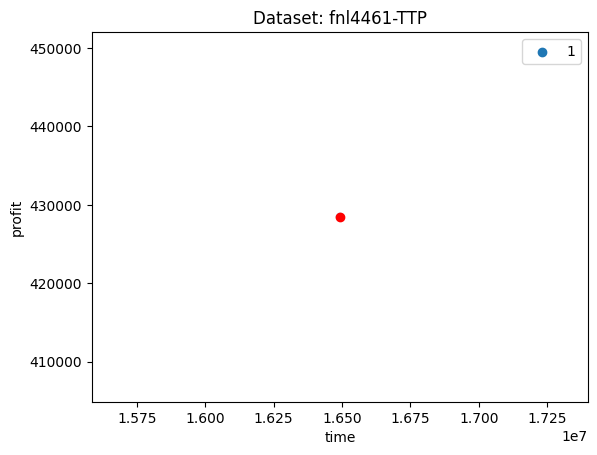

In [52]:
plot_experiment_results(data4,ga4,res4)

fnl4461-n44600

In [ ]:
data5 = read_problem(path[5])
ga5 = GA(
    data5,
    pop_size,
    max_generation,
    tour_size,
    mut_prob,
    cross_prob
)
res5 = ga5.run()

In [ ]:
plot_experiment_results(data5,ga5,res5)

pla33810-n33809

In [ ]:
data6 = read_problem(path[6])
ga6 = GA(
    data6,
    pop_size,
    max_generation,
    tour_size,
    mut_prob,
    cross_prob
)
res6 = ga6.run()

In [ ]:
plot_experiment_results(data6,ga6,res6)

pla33810-n169045

In [ ]:
data7 = read_problem(path[7])
ga7 = GA(
    data7,
    pop_size,
    max_generation,
    tour_size,
    mut_prob,
    cross_prob
)
res7 = ga7.run()

In [ ]:
plot_experiment_results(data7,ga7,res7)

pla33810-n338090

In [ ]:
data8 = read_problem(path[8])
ga8 = GA(
    data8,
    pop_size,
    max_generation,
    tour_size,
    mut_prob,
    cross_prob
)
res8 = ga8.run()

In [ ]:
plot_experiment_results(data8,ga8,res8)